In [1]:
from platform import python_version
print("Python version used for this analysis is: ", python_version())

Python version used for this analysis is:  3.9.12


In [2]:
#Loading python libraries
import sys
import os

#loading Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import re
import tensorflow as tf
import keras

from tensorflow import keras
from keras import preprocessing

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import pandas as pd
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
nltk.download ('stopwords')
nltk.download ('punkt')
nltk.download ('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Masey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Masey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Masey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Masey\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv('yelp_labelled.txt', names=['review', 'sentiment'], sep='\t')

In [5]:
df.shape

(1000, 2)

In [6]:
df['sentiment'].value_counts()

1    500
0    500
Name: sentiment, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
#presence of unusual characters
commentary = df['review']
list_of_characters = []
for comment in commentary:
    for character in comment:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['W', 'o', 'w', '.', ' ', 'L', 'v', 'e', 'd', 't', 'h', 'i', 's', 'p', 'l', 'a', 'c', 'C', 'r', 'u', 'n', 'g', 'N', 'y', 'x', 'j', 'S', 'b', 'M', 'k', 'f', 'R', 'm', 'T', 'I', 'H', "'", 'A', ')', ',', '!', 'V', 'B', 'z', '-', '4', 'O', '2', '3', 'q', 'P', 'F', 'G', '5', '1', '0', 'E', 'Z', 'D', 'U', 'J', 'Y', 'K', '&', 'é', ':', ';', '9', '7', '(', 'X', '"', '/', '8', 'Q', '$', '%', '+', '*', '?', '6', 'ê']


In [9]:
#identify vocabulary size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])
print("Vocabulary size: ", len(tokenizer.word_index) + 1)

Vocabulary size:  2072


In [10]:
stop_words = stopwords.words('english')
nlist = ['no', 'nor', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 'wouldn', "wouldn't"]
review_mod = []
for description in df.review:
    description = [word for word in description.split(' ') if ((word in nlist) or (not word in stop_words))]
    description=" ".join(description)
    review_mod.append(description)

In [11]:
review_mod[1]

'Crust not good.'

In [12]:
review_length= []
for char_len in review_mod:
    review_length.append(len(char_len.split(' ')))
    
review_max = np.max(review_length)
review_min = np.min(review_length)
review_median = np.median(review_length)
print("The maximum length of our sequences would be: ", review_max)
print("The median length of our sequences would be: ", review_median)
print("The minimum length of our sequences would be: ", review_min)

The maximum length of our sequences would be:  20
The median length of our sequences would be:  6.0
The minimum length of our sequences would be:  1


In [13]:
review_list = []
for rev in review_mod:
    rev = re.sub("[^a-zA-Z]"," ", rev)  #remove special characters
    rev = rev.lower() #convert to lower case
    rev = nltk.word_tokenize(rev) #perform tokenization
    lemma = nltk.WordNetLemmatizer()  #perform lemmatization
    rev = [lemma.lemmatize(word) for word in rev]
    review_list.append(rev)

In [14]:
review_list [1]

['crust', 'not', 'good']

In [15]:
#identify vocabulary size again
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_list)
vocab_size = len(tokenizer.word_index) + 1 
print("Vocabulary size: ", vocab_size)

Vocabulary size:  1869


In [16]:
#Identify the word embedding length
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocab_size)),0))
print("Word Embedding Length: ",max_sequence_embedding)

Word Embedding Length:  7


In [17]:
encoded_doc = tokenizer.texts_to_sequences(review_list)

In [18]:
print(review_list [1])
print(encoded_doc [1])

['crust', 'not', 'good']
[537, 4, 7]


In [19]:
#padding data
maxlen = 20
encoded_doc = pad_sequences(encoded_doc, maxlen=maxlen)

In [20]:
print (encoded_doc[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 537
   4   7]


In [21]:
#split data
X = encoded_doc
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [22]:
print(X_train.shape, X_test.shape)

(800, 20) (200, 20)


In [23]:
pd.DataFrame(X_train).to_csv(r'C:\Users\Masey\Documents\School Work\D213\X_train.csv')
pd.DataFrame(X_test).to_csv(r'C:\Users\Masey\Documents\School Work\D213\X_test.csv')
pd.DataFrame(y_train).to_csv(r'C:\Users\Masey\Documents\School Work\D213\y_train.csv')
pd.DataFrame(y_test).to_csv(r'C:\Users\Masey\Documents\School Work\D213\y_test.csv')

In [24]:
X_train

array([[   0,    0,    0, ..., 1833,  563,  145],
       [   0,    0,    0, ...,  145,    3,   33],
       [   0,    0,    0, ...,  593,  253,  112],
       ...,
       [   0,    0,    0, ...,   12,  246,  835],
       [   0,    0,    0, ..., 1067,   97, 1068],
       [   0,    0,    0, ...,   51,    6,   50]])

In [97]:
#build LSTM Network
embed_size = 32

early_stopping_monitor = EarlyStopping(patience=2)

model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length = maxlen))
model.add(LSTM(units=60, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [98]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 32)            59808     
_________________________________________________________________
lstm_8 (LSTM)                (None, 60)                22320     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 61        
Total params: 82,189
Trainable params: 82,189
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit(X_train, y_train, epochs=20, batch_size = 32, callbacks=[early_stopping_monitor], validation_data=(X_test, y_test), verbose=True)

Epoch 1/20
25/25 [==============================] - 6s 62ms/step - loss: 0.6913 - accuracy: 0.5200 - val_loss: 0.6918 - val_accuracy: 0.4400
Epoch 2/20
25/25 [==============================] - 0s 20ms/step - loss: 0.6645 - accuracy: 0.6438 - val_loss: 0.6961 - val_accuracy: 0.4850
Epoch 3/20
25/25 [==============================] - 1s 21ms/step - loss: 0.5451 - accuracy: 0.7738 - val_loss: 0.5307 - val_accuracy: 0.7100
Epoch 4/20
25/25 [==============================] - 1s 21ms/step - loss: 0.3641 - accuracy: 0.8938 - val_loss: 0.5218 - val_accuracy: 0.7150
Epoch 5/20
25/25 [==============================] - 1s 21ms/step - loss: 0.2222 - accuracy: 0.9300 - val_loss: 0.4600 - val_accuracy: 0.8050
Epoch 6/20
25/25 [==============================] - 1s 20ms/step - loss: 0.1448 - accuracy: 0.9613 - val_loss: 0.5226 - val_accuracy: 0.8100
Epoch 7/20
25/25 [==============================] - 1s 20ms/step - loss: 0.1108 - accuracy: 0.9712 - val_loss: 0.4866 - val_accuracy: 0.8300


In [100]:
history.history

{'loss': [0.6913062930107117,
  0.664508581161499,
  0.5451111197471619,
  0.3640877604484558,
  0.2221764773130417,
  0.14484277367591858,
  0.11075608432292938],
 'accuracy': [0.5199999809265137,
  0.643750011920929,
  0.7737500071525574,
  0.893750011920929,
  0.9300000071525574,
  0.9612500071525574,
  0.9712499976158142],
 'val_loss': [0.6918187141418457,
  0.6960535645484924,
  0.5307176113128662,
  0.5218402743339539,
  0.45996275544166565,
  0.5226386189460754,
  0.48663148283958435],
 'val_accuracy': [0.4399999976158142,
  0.48500001430511475,
  0.7099999785423279,
  0.7149999737739563,
  0.8050000071525574,
  0.8100000023841858,
  0.8299999833106995]}

In [101]:
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

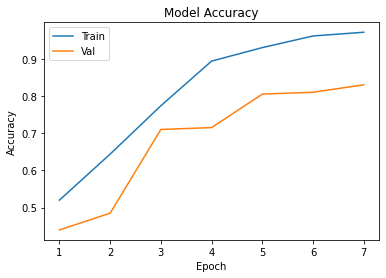

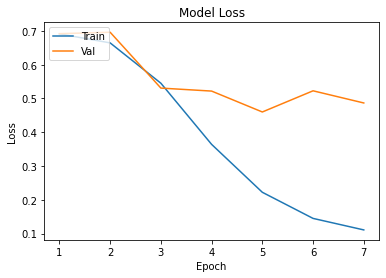

In [102]:
plot_learningCurve(history, 7)


In [103]:
#evaluate the model against test data
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 10ms/step - loss: 0.4866 - accuracy: 0.8300


[0.48663148283958435, 0.8299999833106995]

In [104]:
model.save('SentimentAnalysisModel.h5')